In [41]:
! pip install keras
! pip install tensorflow

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from sklearn.preprocessing import  LabelEncoder , MinMaxScaler
from sklearn.metrics import accuracy_score , classification_report

In [43]:
data = pd.read_csv(r"C:\Users\user\Downloads\forestfires (2).csv")

In [44]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [46]:
data.duplicated().any()

True

In [47]:
data = data.drop_duplicates()

In [48]:
data.duplicated().any()

False

In [49]:
le = LabelEncoder()

data = data.apply(le.fit_transform)

In [50]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,1,0,0,0,0,1
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   month          509 non-null    int32
 1   day            509 non-null    int32
 2   FFMC           509 non-null    int64
 3   DMC            509 non-null    int64
 4   DC             509 non-null    int64
 5   ISI            509 non-null    int64
 6   temp           509 non-null    int64
 7   RH             509 non-null    int64
 8   wind           509 non-null    int64
 9   rain           509 non-null    int64
 10  area           509 non-null    int64
 11  dayfri         509 non-null    int64
 12  daymon         509 non-null    int64
 13  daysat         509 non-null    int64
 14  daysun         509 non-null    int64
 15  daythu         509 non-null    int64
 16  daytue         509 non-null    int64
 17  daywed         509 non-null    int64
 18  monthapr       509 non-null    int64
 19  monthaug

In [52]:
data.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1


<Axes: >

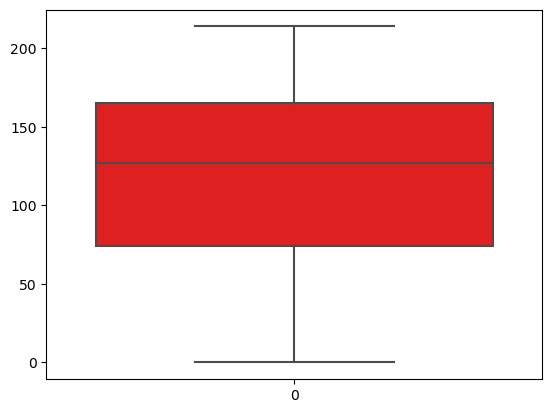

In [53]:
sn.boxplot(data['DMC'] , color = 'red')

<Axes: >

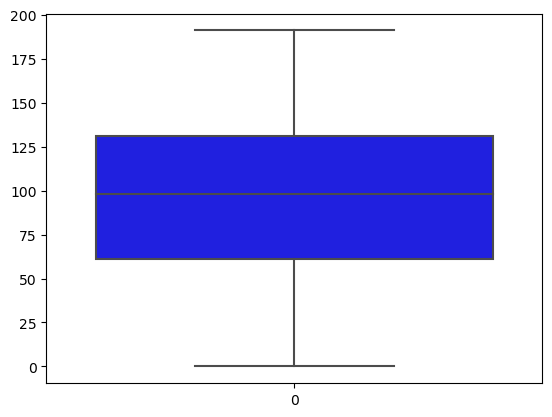

In [54]:
sn.boxplot(data['temp'] , color = 'blue')

{'whiskers': [<matplotlib.lines.Line2D at 0x221f69a5ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x221f69a6410>,
 'boxes': [<matplotlib.lines.Line2D at 0x221f69a5c30>],
 'medians': [<matplotlib.lines.Line2D at 0x221f69a68c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221f69a6b60>],
 'means': []}

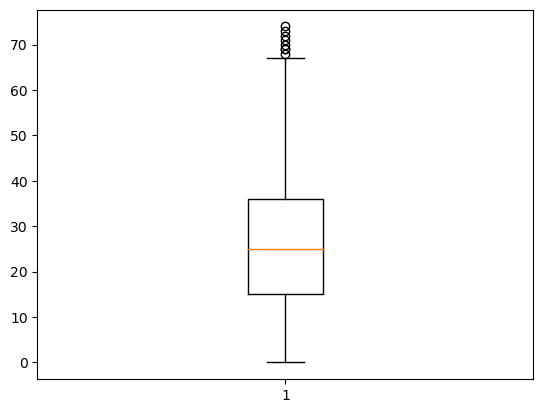

In [55]:
plt.boxplot(data['RH'] )

<Axes: xlabel='temp', ylabel='Count'>

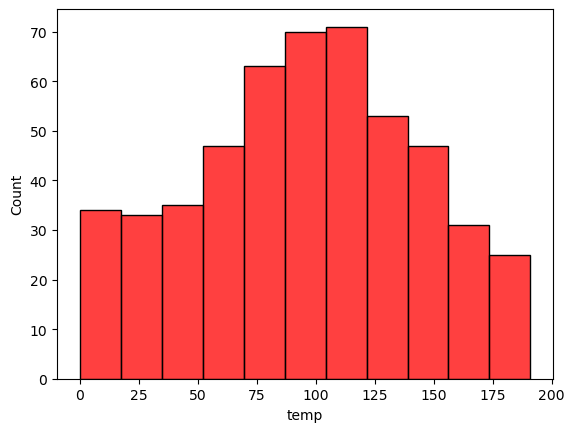

In [56]:
sn.histplot(data['temp'] , color = 'red')

C:\Users\user\AppData\Local\Temp\ipykernel_23924\466284655.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['temp'] , color = 'blue')


<Axes: xlabel='temp', ylabel='Density'>

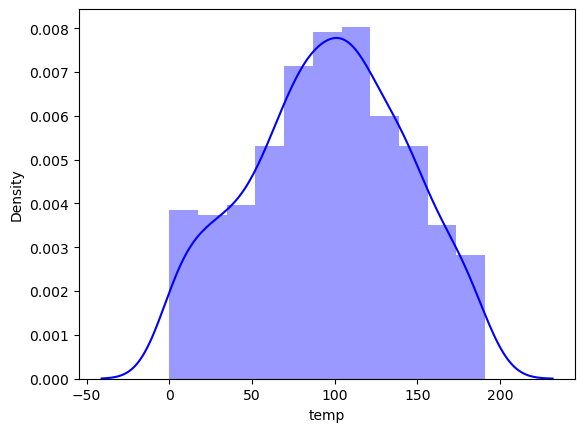

In [57]:
sn.distplot(data['temp'] , color = 'blue')

In [58]:
data.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1


In [59]:
x = data.drop(['size_category'] , axis  = 1)

In [60]:
y = data['size_category']

In [61]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,1,0,0,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data = data.drop(['month' , 'day'] , axis = 1)

In [76]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,28,37,41,29,12,34,14,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,56,49,144,42,85,16,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,56,56,156,42,55,16,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,67,48,33,64,13,72,8,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,46,66,46,68,30,73,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,9,71,141,7,172,15,5,0,123,0,...,0,0,0,0,0,0,0,0,0,0
513,9,71,141,7,123,54,12,0,228,0,...,0,0,0,0,0,0,0,0,0,0
514,9,71,141,7,116,53,14,0,167,0,...,0,0,0,0,0,0,0,0,0,0
515,92,168,122,80,156,25,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
mapping = {'small':1 , 'large':2}

In [79]:
data = data.replace(mapping)

In [80]:
x = np.array(data.iloc[: , 0:28])
y = np.array(data.iloc[: , 28])

In [85]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [87]:
x_norm = norm_func(x)

In [88]:
x_train , x_test , y_train , y_test = train_test_split(x_norm , y , test_size = 0.20 , stratify = y)

In [89]:
model = Sequential()
model.add(Dense(8 , input_dim = 28 , activation = 'linear'))
model.add(Dense(4 , activation = 'tanh'))
model.add(Dense(1 , activation = 'sigmoid'))

In [91]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics =  ['accuracy'])

In [92]:
MD = model.fit(x_train , y_train , validation_split  = 0.3 , epochs = 20 , batch_size = 10)

Epoch 1/20
29/29 [==============================] - 1s 9ms/step - loss: 0.6273 - accuracy: 0.7570 - val_loss: 0.5718 - val_accuracy: 0.8455
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.8521 - val_loss: 0.5104 - val_accuracy: 0.7642
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.8204 - val_loss: 0.4729 - val_accuracy: 0.7642
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8239 - val_loss: 0.4414 - val_accuracy: 0.7805
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8627 - val_loss: 0.4102 - val_accuracy: 0.8374
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.8838 - val_loss: 0.3808 - val_accuracy: 0.8618
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.9155 - val_loss: 0.3509 - val_accuracy: 0.8780
Epoch 8/20
29/29 [==

In [93]:
evaluation = model.evaluate(x_train , y_train)

13/13 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9803


In [94]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [98]:
y_pred

array([[0.9307343 ],
       [0.13477165],
       [0.981835  ],
       [0.9815365 ],
       [0.04026327],
       [0.97306573],
       [0.93732524],
       [0.98293114],
       [0.6002871 ],
       [0.14743495],
       [0.9786686 ],
       [0.9802034 ],
       [0.97134244],
       [0.98077506],
       [0.3471476 ],
       [0.9615652 ],
       [0.9838982 ],
       [0.9744713 ],
       [0.02562213],
       [0.7756143 ],
       [0.9845778 ],
       [0.9416685 ],
       [0.02691318],
       [0.90021604],
       [0.62134445],
       [0.976061  ],
       [0.1075078 ],
       [0.960491  ],
       [0.97787184],
       [0.97598726],
       [0.97305876],
       [0.75475585],
       [0.9786442 ],
       [0.97541404],
       [0.94952565],
       [0.6149003 ],
       [0.94250375],
       [0.9701391 ],
       [0.94310355],
       [0.98053473],
       [0.88197434],
       [0.02590508],
       [0.97634554],
       [0.33749086],
       [0.6153324 ],
       [0.97776294],
       [0.8908132 ],
       [0.970